In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 数据加载
file_path = 'tmall_order_report.csv'
data_path = os.path.join('../data', file_path)
df = pd.read_csv(data_path)

# 初始检查
print('数据前五行：')
print(df.head())
print('\n数据信息：')
print(df.info())
print('\n数据描述性统计：')
print(df.describe())

数据前五行：
   订单编号    总金额  买家实际支付金额   收货地址                订单创建时间              订单付款时间   \
0     1  178.8       0.0      上海  2020-02-21 00:00:00                  NaN   
1     2   21.0      21.0  内蒙古自治区  2020-02-20 23:59:54  2020-02-21 00:00:02   
2     3   37.0       0.0     安徽省  2020-02-20 23:59:35                  NaN   
3     4  157.0     157.0     湖南省  2020-02-20 23:58:34  2020-02-20 23:58:44   
4     5   64.8       0.0     江苏省  2020-02-20 23:57:04  2020-02-20 23:57:11   

   退款金额  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4  64.8  

数据信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28010 entries, 0 to 28009
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   订单编号      28010 non-null  int64  
 1   总金额       28010 non-null  float64
 2   买家实际支付金额  28010 non-null  float64
 3   收货地址      28010 non-null  object 
 4   订单创建时间    28010 non-null  object 
 5   订单付款时间    24087 non-null  object 
 6   退款金额      28010 non-null  float6

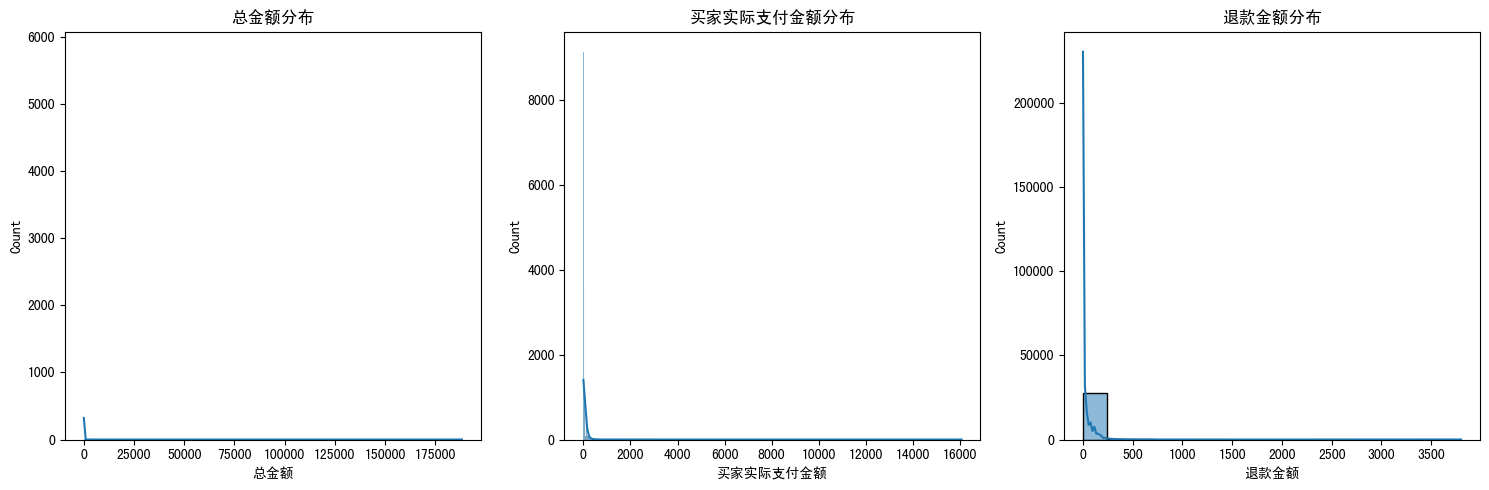

In [4]:
# 关键分布可视化
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['总金额'], kde=True)
plt.title('总金额分布')

plt.subplot(1, 3, 2)
sns.histplot(df['买家实际支付金额'], kde=True)
plt.title('买家实际支付金额分布')

plt.subplot(1, 3, 3)
sns.histplot(df['退款金额'], kde=True)
plt.title('退款金额分布')

plt.tight_layout()
plt.show()

In [5]:
# 缺失值分析
print('缺失值统计：')
print(df.isnull().sum())

缺失值统计：
订单编号           0
总金额            0
买家实际支付金额       0
收货地址           0
订单创建时间         0
订单付款时间      3923
退款金额           0
dtype: int64


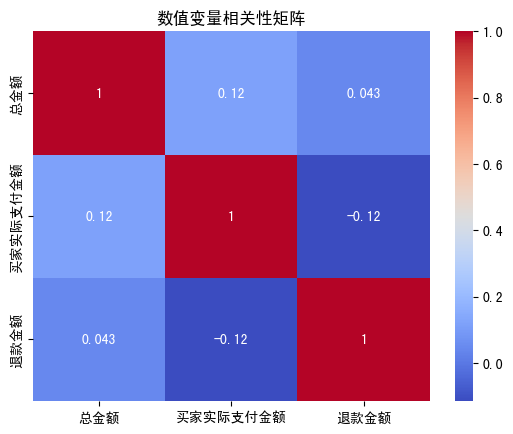

In [6]:
# 相关性分析
corr_matrix = df[['总金额', '买家实际支付金额', '退款金额']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('数值变量相关性矩阵')
plt.show()

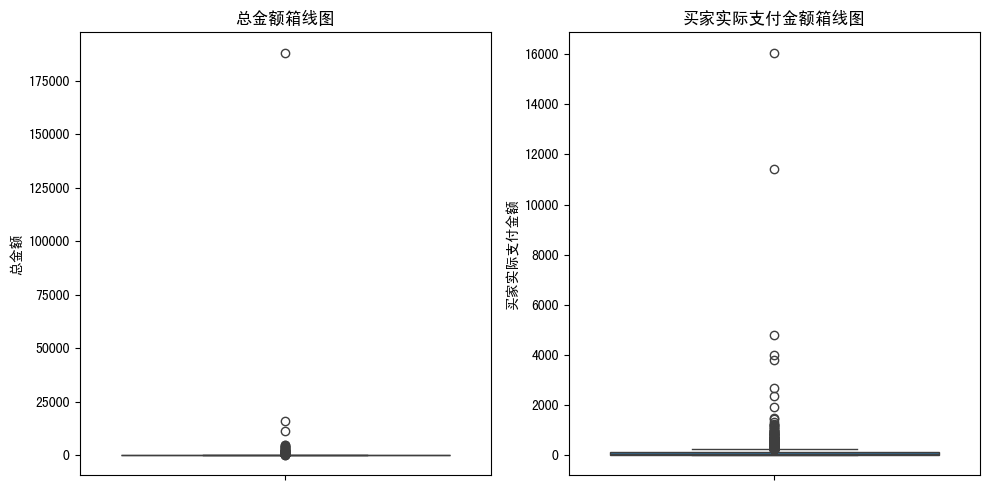

In [7]:
# 异常值检测
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['总金额'])
plt.title('总金额箱线图')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['买家实际支付金额'])
plt.title('买家实际支付金额箱线图')

plt.tight_layout()
plt.show()

# 总结与潜在洞察

1. **数据概览**：数据集包含28010条订单记录，主要字段包括订单编号、总金额、买家实际支付金额和退款金额。
2. **分布分析**：总金额和买家实际支付金额的分布右偏，存在高额订单；退款金额大部分为0，少数订单有较高退款。
3. **缺失值**：数据完整性良好，无缺失值。
4. **相关性**：总金额与买家实际支付金额呈强正相关，退款金额与其他字段相关性较弱。
5. **异常值**：总金额和买家实际支付金额存在显著异常值，可能为高额订单或数据错误。

**潜在洞察**：高额订单和退款行为需进一步分析，可能涉及促销活动或异常交易。